(100, 2)


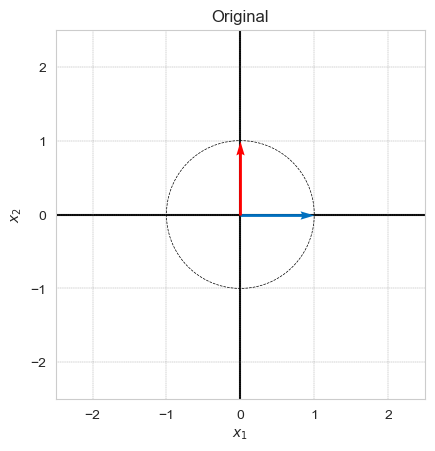

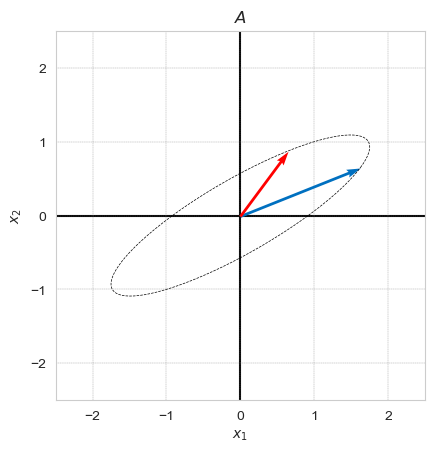

=== U ===
[[ 0.86602858 -0.4999945 ]
 [ 0.4999945   0.86602858]]
=== S ===
[[1.9999835 0.       ]
 [0.        0.5000165]]
=== V ===
[[ 0.86602858 -0.4999945 ]
 [ 0.4999945   0.86602858]]


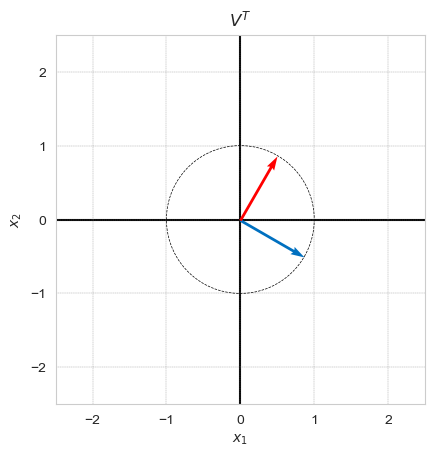

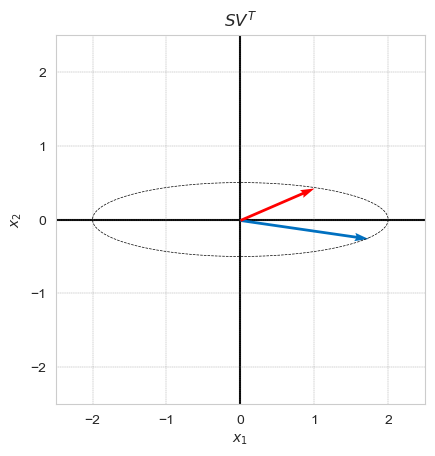

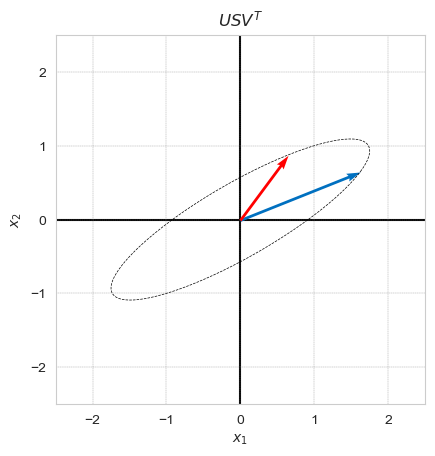

In [5]:
# Bk4_Ch15_01.py

import numpy as np
import matplotlib.pyplot as plt


def visualize(X_circle, X_vec, title_txt):
    '''可视化'''
    
    fig, ax = plt.subplots()

    plt.plot(X_circle[:, 0], X_circle[:, 1], 'k',
             linestyle='--',
             linewidth=0.5)

    plt.quiver(0, 0, X_vec[0, 0], X_vec[0, 1],
               angles='xy', scale_units='xy', scale=1,
               color=[0, 0.4392, 0.7529])

    plt.quiver(0, 0, X_vec[1, 0], X_vec[1, 1],
               angles='xy', scale_units='xy', scale=1,
               color=[1, 0, 0])

    plt.axvline(x=0, color='k', zorder=0)
    plt.axhline(y=0, color='k', zorder=0)

    plt.ylabel('$x_2$')
    plt.xlabel('$x_1$')

    ax.set_aspect(1)
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.5, 2.5])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
    ax.set_xticks(np.linspace(-2, 2, 5));
    ax.set_yticks(np.linspace(-2, 2, 5));
    plt.title(title_txt)
    plt.show()


theta = np.linspace(0, 2 * np.pi, 100)

circle_x1 = np.cos(theta)
circle_x2 = np.sin(theta)

X_vec = np.array([[1, 0],
                  [0, 1]])

X_circle = np.array([circle_x1, circle_x2]).T
print(X_circle.shape)

# plot original circle and two vectors
visualize(X_circle, X_vec, 'Original')

A = np.array([[1.6250, 0.6495],
              [0.6495, 0.8750]])

# plot the transformation of A

visualize(X_circle @ A.T, X_vec @ A.T, '$A$')

# A = U @ S @ V.T
# 奇异值分解
U, S, V = np.linalg.svd(A)
# 创建对角矩阵
S = np.diag(S)
V[:, 0] = -V[:, 0]  # reverse sign of first vector of V
U[:, 0] = -U[:, 0]  # reverse sign of first vector of U

print('=== U ===')
print(U)
print('=== S ===')
print(S)
print('=== V ===')
print(V)

# plot the transformation of V

visualize(X_circle @ V, X_vec @ V, '$V^T$')

# plot the transformation of V @ S

visualize(X_circle @ V @ S, X_vec @ V @ S, '$SV^T$')

# plot the transformation of V @ S @ U.T

visualize(X_circle @ V @ S @ U.T, X_vec @ V @ S @ U.T, '$USV^T$')

e1 = np.array([[1],
               [0]])

e2 = np.array([[0],
               [1]])

# Calculate step by step from e1 and e2
VT_e1 = V.T @ e1
VT_e2 = V.T @ e2

S_VT_e1 = S @ VT_e1
S_VT_e2 = S @ VT_e2

U_S_VT_e1 = U @ S_VT_e1
U_S_VT_e2 = U @ S_VT_e2

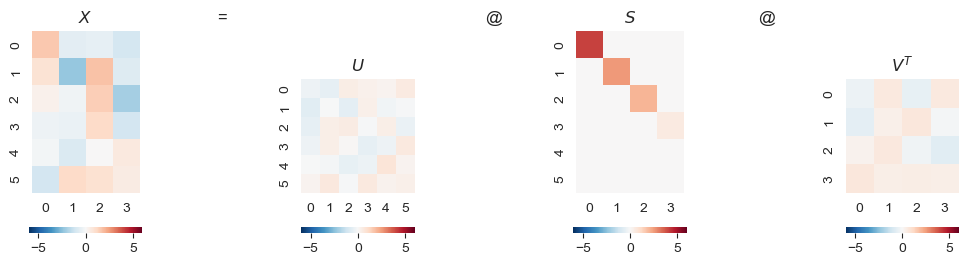

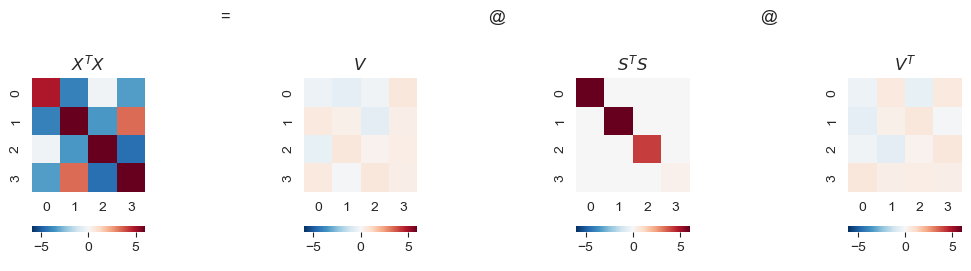

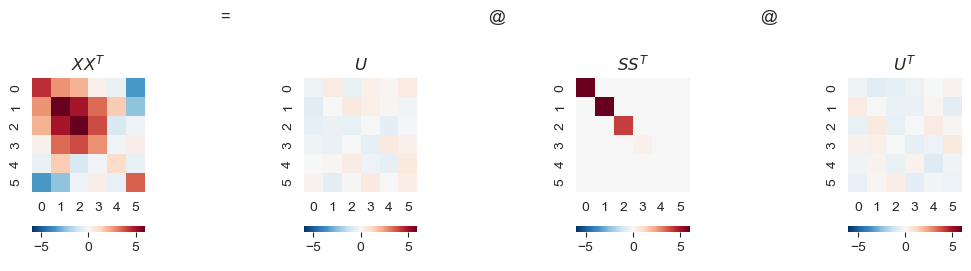

In [12]:
# Bk4_Ch15_02_A 

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['image.cmap'] = 'RdBu_r'
import seaborn as sns

PRECISION = 3


def svd(X):
    
    full_matrices = True

    U, s, Vt = np.linalg.svd(X, full_matrices=full_matrices)

    # Put the vector singular values into a padded matrix

    if full_matrices:
        S = np.zeros(X.shape)
        # np.fill_diagonal 函数将向量 s 的元素填充到对角线
        np.fill_diagonal(S, s)
    else:
        # 创建对角矩阵
        S = np.diag(s)

    # Rounding for display
    # PRECISION 指定保留的小数位数
    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)


def visualize_svd(X, title_X, title_U, title_S, title_V, fig_height=5):
    # Run SVD, as defined above
    U, S, V = svd(X)

    # flatten(order='C') 按列展平成一维数组
    # np.r_() 按列连接数组
    all_ = np.r_[X.flatten(order='C'), U.flatten(order='C'),
    S.flatten(order='C'), V.flatten(order='C')]

    # all_max = max(all_.max(),all_.min())
    # all_min = -max(all_.max(),all_.min())
    all_max = 6
    all_min = -6
    # Visualization
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))

    plt.sca(axs[0])
    ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title(title_X)

    plt.sca(axs[1])
    plt.title('=')
    plt.axis('off')

    plt.sca(axs[2])
    ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title(title_U)

    plt.sca(axs[3])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[4])
    ax = sns.heatmap(S, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title(title_S)

    plt.sca(axs[5])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[6])
    ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title(title_V)
    return X, U, S, V


# Repeatability
np.random.seed(1)

# Generate random matrix
X = np.random.randn(6, 4)

# manipulate X and reduce rank to 3
# X[:,3] = X[:,0] + X[:,1]

X, U, S, V = visualize_svd(X, '$X$', '$U$', '$S$', '$V^T$', fig_height=3)

X_2, U_2, S_2, V_2 = visualize_svd(X.T @ X, '$X^TX$', '$V$', '$S^TS$', '$V^T$', fig_height=3)

X_3, U_3, S_3, V_3 = visualize_svd(X @ X.T, '$XX^T$', '$U$', '$SS^T$', '$U^T$', fig_height=3)


Text(0.5, 1.0, '$I$')

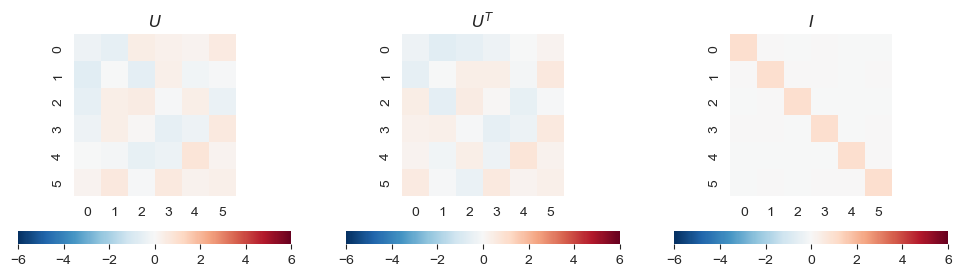

In [7]:
# Bk4_Ch15_02_B

all_max = 6
all_min = -6

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$U$')

plt.sca(axs[1])
ax = sns.heatmap(U.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$U^T$')

plt.sca(axs[2])
ax = sns.heatmap(U @ U.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$I$')


Text(0.5, 1.0, '$I$')

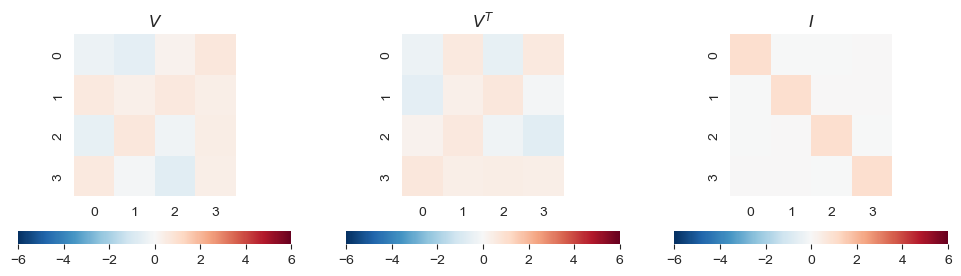

In [8]:
# Bk4_Ch15_02_C

all_max = 6
all_min = -6

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(V, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V$')

plt.sca(axs[1])
ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')

plt.sca(axs[2])
ax = sns.heatmap(V @ V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$I$')


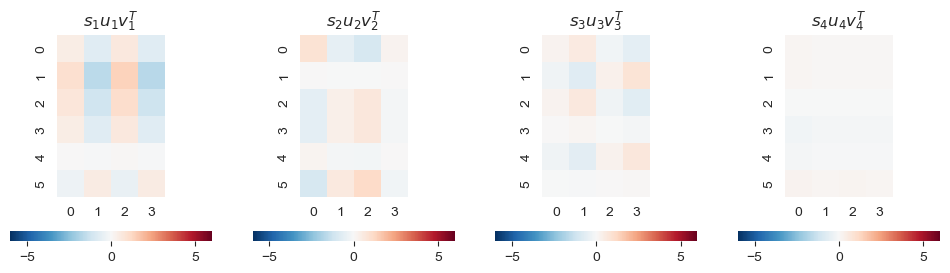

In [10]:
# Bk4_Ch15_02_D

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

for j in [0, 1, 2, 3]:
    # [:, None] 将一维数组变为二维列向量。
    X_j = S[j, j] * U[:, j][:, None] @ V[:, j][None, :];
    plt.sca(axs[j])
    ax = sns.heatmap(X_j, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    title_txt = '$s_' + str(j + 1) + 'u_' + str(j + 1) + 'v_' + str(j + 1) + '^T$'
    plt.title(title_txt)


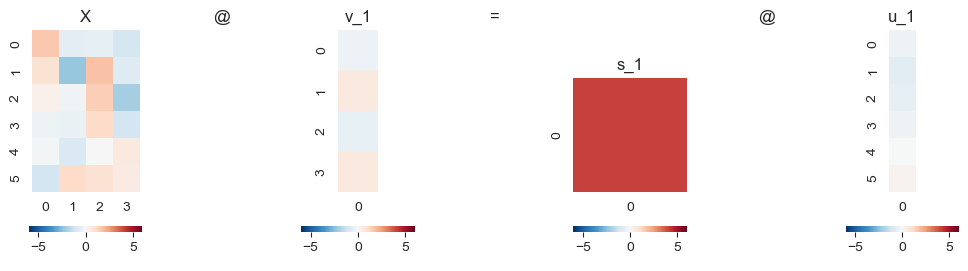

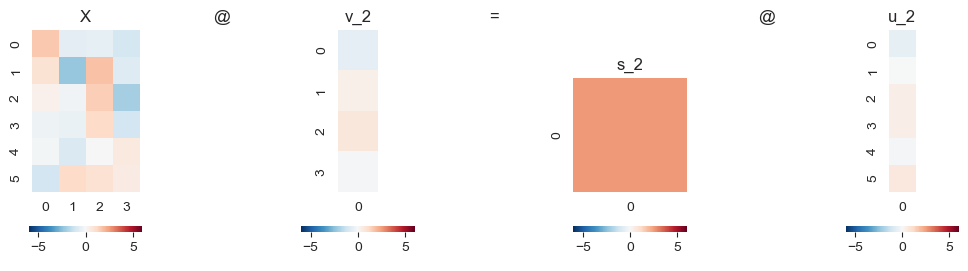

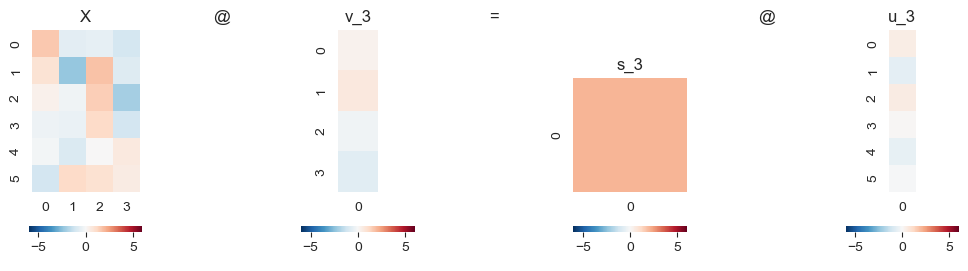

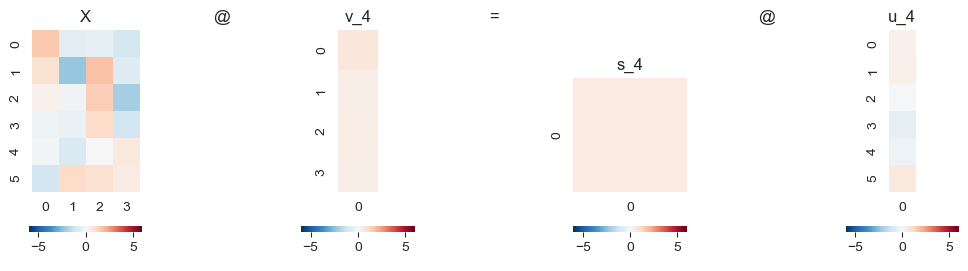

In [11]:
for j in [0, 1, 2, 3]:
    fig, axs = plt.subplots(1, 7, figsize=(12, 3))

    v_j = V[:, j]
    # 转换成列向量
    v_j = np.matrix(v_j).T
    s_j = S[j, j]
    s_j = np.matrix(s_j)
    u_j = U[:, j]
    u_j = np.matrix(u_j).T

    plt.sca(axs[0])
    ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title('X')

    plt.sca(axs[1])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[2])
    ax = sns.heatmap(v_j, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title('v_' + str(j + 1))

    plt.sca(axs[3])
    plt.title('=')
    plt.axis('off')

    plt.sca(axs[4])
    ax = sns.heatmap(s_j, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title('s_' + str(j + 1))

    plt.sca(axs[5])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[6])
    ax = sns.heatmap(u_j, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title('u_' + str(j + 1))